In [1456]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy
import numpy as np


| Estudiante   | Calificación | Horas de estudio |
|--------------|--------------|------------------|
| Estudiante_1 | 85           | 10               |
| Estudiante_2 | 90           | 12               |
| Estudiante_3 | 70           | 6                |
| Estudiante_4 | 88           | 9                |
| Estudiante_5 | 95           | 15               |
| Estudiante_6 | 60           | 4                |
| Estudiante_7 | 78           | 7                |
| Estudiante_8 | 82           | 8                |
| Estudiante_9 | 91           | 13               |
| Estudiante_10| 74           | 5                |


In [1457]:
df = pd.read_csv("calificaciones_estudio.csv")

In [1458]:
print(df)

   Calificación  Horas_de_estudio
0            85                10
1            90                12
2            70                 6
3            88                 9
4            95                15
5            60                 4
6            78                 7
7            82                 8
8            91                13
9            74                 5


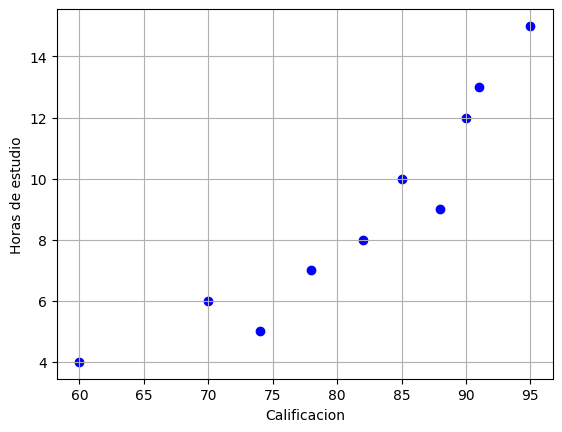

In [1459]:
plt.scatter(df["Calificación"], df["Horas_de_estudio"], color='blue')
plt.xlabel("Calificacion")
plt.ylabel("Horas de estudio")
plt.grid(True)
plt.show()

In [1460]:
n = len(df["Calificación"])
m = len(df["Horas_de_estudio"])
matrizDistancias= np.zeros((n, m), dtype= np.int64)

In [1461]:
calificaciones = df["Calificación"].to_numpy()
horas = df["Horas_de_estudio"].to_numpy()

print(calificaciones, horas)

[85 90 70 88 95 60 78 82 91 74] [10 12  6  9 15  4  7  8 13  5]


In [1462]:
for i in range(n):
    for j in range(n):
        dx = calificaciones[i] - calificaciones[j]
        dy = horas[i] - horas[j]
        distancia = dx**2 + dy**2
        matrizDistancias[i][j] = distancia

print(matrizDistancias)

[[   0   29  241   10  125  661   58   13   45  146]
 [  29    0  436   13   34  964  169   80    2  305]
 [ 241  436    0  333  706  104   65  148  490   17]
 [  10   13  333    0   85  809  104   37   25  212]
 [ 125   34  706   85    0 1346  353  218   20  541]
 [ 661  964  104  809 1346    0  333  500 1042  197]
 [  58  169   65  104  353  333    0   17  205   20]
 [  13   80  148   37  218  500   17    0  106   73]
 [  45    2  490   25   20 1042  205  106    0  353]
 [ 146  305   17  212  541  197   20   73  353    0]]


In [1463]:
#matriz = pd.DataFrame(etiquetas)
#similaridades = np.zeros((n,m))
sim = np.min(matrizDistancias[np.nonzero(matrizDistancias)])
print("distancia minima: ", sim)
posicion = np.where(matrizDistancias == sim)
print(posicion)
#similaridades[0][0] = posicion[0]

distancia minima:  2
(array([1, 8]), array([8, 1]))


In [1464]:
par = (posicion[0][0], posicion[1][0])
print("pares: ", par)
pares_array = np.zeros(m, dtype=object)
print(par)
pares_array[0] = par
print(pares_array)

pares:  (np.int64(1), np.int64(8))
(np.int64(1), np.int64(8))
[(np.int64(1), np.int64(8)) 0 0 0 0 0 0 0 0 0]


In [1465]:
M = matrizDistancias.copy()
print(M)

[[   0   29  241   10  125  661   58   13   45  146]
 [  29    0  436   13   34  964  169   80    2  305]
 [ 241  436    0  333  706  104   65  148  490   17]
 [  10   13  333    0   85  809  104   37   25  212]
 [ 125   34  706   85    0 1346  353  218   20  541]
 [ 661  964  104  809 1346    0  333  500 1042  197]
 [  58  169   65  104  353  333    0   17  205   20]
 [  13   80  148   37  218  500   17    0  106   73]
 [  45    2  490   25   20 1042  205  106    0  353]
 [ 146  305   17  212  541  197   20   73  353    0]]


In [1466]:
etiquetas = np.array(['E1','E2','E3','E4','E5','E6','E7','E8','E9','E10'])
parPd = etiquetas[par[0]]

matrizE = pd.DataFrame(matrizDistancias, index=etiquetas, columns=etiquetas)
print(matrizE)

      E1   E2   E3   E4    E5    E6   E7   E8    E9  E10
E1     0   29  241   10   125   661   58   13    45  146
E2    29    0  436   13    34   964  169   80     2  305
E3   241  436    0  333   706   104   65  148   490   17
E4    10   13  333    0    85   809  104   37    25  212
E5   125   34  706   85     0  1346  353  218    20  541
E6   661  964  104  809  1346     0  333  500  1042  197
E7    58  169   65  104   353   333    0   17   205   20
E8    13   80  148   37   218   500   17    0   106   73
E9    45    2  490   25    20  1042  205  106     0  353
E10  146  305   17  212   541   197   20   73   353    0


In [1467]:
def resaltar_celda(x):
    matrizE = pd.DataFrame('', index=x.index, columns=x.columns)
    matrizE.iat[posicion[0][1], posicion[0][0]] = 'background-color: yellow; color: black; font-weight: bold;'
    return matrizE

def mostrar_matriz(x):
    matrizE = pd.DataFrame('background-color: yellow; color: black; font-weight: bold;',
                           index=x.index, columns=x.columns)
    return matrizE


# Aplicamos estilos
matrizE.style.apply(resaltar_celda, axis=None)

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10
E1,0,29,241,10,125,661,58,13,45,146
E2,29,0,436,13,34,964,169,80,2,305
E3,241,436,0,333,706,104,65,148,490,17
E4,10,13,333,0,85,809,104,37,25,212
E5,125,34,706,85,0,1346,353,218,20,541
E6,661,964,104,809,1346,0,333,500,1042,197
E7,58,169,65,104,353,333,0,17,205,20
E8,13,80,148,37,218,500,17,0,106,73
E9,45,2,490,25,20,1042,205,106,0,353
E10,146,305,17,212,541,197,20,73,353,0


In [1468]:
clusters = np.array(['E1','E2','E3','E4','E5','E6','E7','E8','E9','E10'], dtype=object)
clusters[posicion[0][0]] = "{}{}".format(etiquetas[posicion[0][0]], etiquetas[posicion[0][1]])

clusters = np.delete(clusters, posicion[0][1])
print(clusters)

['E1' 'E2E9' 'E3' 'E4' 'E5' 'E6' 'E7' 'E8' 'E10']


In [1469]:
matrizFusion1 = matrizE.drop(index=etiquetas[posicion[0][0]])
matrizFusion1 = matrizE.drop(columns=etiquetas[posicion[0][1]])

In [1470]:
matrizFusion1 = pd.DataFrame(matrizE, index=clusters, columns=clusters)

In [1471]:
print(matrizFusion1)

         E1  E2E9     E3     E4      E5      E6     E7     E8    E10
E1      0.0   NaN  241.0   10.0   125.0   661.0   58.0   13.0  146.0
E2E9    NaN   NaN    NaN    NaN     NaN     NaN    NaN    NaN    NaN
E3    241.0   NaN    0.0  333.0   706.0   104.0   65.0  148.0   17.0
E4     10.0   NaN  333.0    0.0    85.0   809.0  104.0   37.0  212.0
E5    125.0   NaN  706.0   85.0     0.0  1346.0  353.0  218.0  541.0
E6    661.0   NaN  104.0  809.0  1346.0     0.0  333.0  500.0  197.0
E7     58.0   NaN   65.0  104.0   353.0   333.0    0.0   17.0   20.0
E8     13.0   NaN  148.0   37.0   218.0   500.0   17.0    0.0   73.0
E10   146.0   NaN   17.0  212.0   541.0   197.0   20.0   73.0    0.0


In [1472]:
print(clusters)

['E1' 'E2E9' 'E3' 'E4' 'E5' 'E6' 'E7' 'E8' 'E10']


In [1473]:
compMin = matrizDistancias[:,posicion[0]]
print(compMin)



[[  29   45]
 [   0    2]
 [ 436  490]
 [  13   25]
 [  34   20]
 [ 964 1042]
 [ 169  205]
 [  80  106]
 [   2    0]
 [ 305  353]]


In [1474]:
mat_new = np.delete(compMin, posicion[0][1], axis=0)

In [1475]:
print(mat_new)

[[  29   45]
 [   0    2]
 [ 436  490]
 [  13   25]
 [  34   20]
 [ 964 1042]
 [ 169  205]
 [  80  106]
 [ 305  353]]


In [1476]:
disClus = np.min(mat_new, axis=1)
print(disClus)

[ 29   0 436  13  20 964 169  80 305]


In [1477]:

print(matrizFusion1)

         E1  E2E9     E3     E4      E5      E6     E7     E8    E10
E1      0.0   NaN  241.0   10.0   125.0   661.0   58.0   13.0  146.0
E2E9    NaN   NaN    NaN    NaN     NaN     NaN    NaN    NaN    NaN
E3    241.0   NaN    0.0  333.0   706.0   104.0   65.0  148.0   17.0
E4     10.0   NaN  333.0    0.0    85.0   809.0  104.0   37.0  212.0
E5    125.0   NaN  706.0   85.0     0.0  1346.0  353.0  218.0  541.0
E6    661.0   NaN  104.0  809.0  1346.0     0.0  333.0  500.0  197.0
E7     58.0   NaN   65.0  104.0   353.0   333.0    0.0   17.0   20.0
E8     13.0   NaN  148.0   37.0   218.0   500.0   17.0    0.0   73.0
E10   146.0   NaN   17.0  212.0   541.0   197.0   20.0   73.0    0.0


In [1478]:
matrizFusion1.iloc[:, posicion[0][0]] = disClus
matrizFusion1.iloc[posicion[0][0], :] = disClus

In [1479]:
print(matrizFusion1)

         E1   E2E9     E3     E4      E5      E6     E7     E8    E10
E1      0.0   29.0  241.0   10.0   125.0   661.0   58.0   13.0  146.0
E2E9   29.0    0.0  436.0   13.0    20.0   964.0  169.0   80.0  305.0
E3    241.0  436.0    0.0  333.0   706.0   104.0   65.0  148.0   17.0
E4     10.0   13.0  333.0    0.0    85.0   809.0  104.0   37.0  212.0
E5    125.0   20.0  706.0   85.0     0.0  1346.0  353.0  218.0  541.0
E6    661.0  964.0  104.0  809.0  1346.0     0.0  333.0  500.0  197.0
E7     58.0  169.0   65.0  104.0   353.0   333.0    0.0   17.0   20.0
E8     13.0   80.0  148.0   37.0   218.0   500.0   17.0    0.0   73.0
E10   146.0  305.0   17.0  212.0   541.0   197.0   20.0   73.0    0.0


In [1480]:
matrizDistancias1 = matrizDistancias.copy()
mat_new = np.delete(matrizDistancias1, posicion[0][0], axis=0)   # borrar fila
mat_new = np.delete(mat_new, posicion[0][1], axis=1)

In [1481]:
min1 = matrizFusion1.values[matrizFusion1!= 0].min()

In [1482]:
print(min1)
matrizFusion1Np = matrizFusion1.to_numpy()

10.0


In [1483]:
posicion = np.where(matrizFusion1Np  == min1)
print(posicion)

(array([0, 3]), array([3, 0]))


In [1484]:

matrizE= matrizFusion1
print(posicion[0])
matrizE.astype(int)
def resaltar_celda(x):
    matrizE = pd.DataFrame('', index=x.index, columns=x.columns)
    matrizE.iat[posicion[0][1], posicion[0][0] ] = 'background-color: yellow; color: black; font-weight: bold;'
    return matrizE

matrizE.style.apply(resaltar_celda, axis=None)

[0 3]


,E1,E2E9,E3,E4,E5,E6,E7,E8,E10
E1,0.000000,29.000000,241.000000,10.000000,125.000000,661.000000,58.000000,13.000000,146.000000
E2E9,29.000000,0.000000,436.000000,13.000000,20.000000,964.000000,169.000000,80.000000,305.000000
E3,241.000000,436.000000,0.000000,333.000000,706.000000,104.000000,65.000000,148.000000,17.000000
E4,10.000000,13.000000,333.000000,0.000000,85.000000,809.000000,104.000000,37.000000,212.000000
E5,125.000000,20.000000,706.000000,85.000000,0.000000,1346.000000,353.000000,218.000000,541.000000
E6,661.000000,964.000000,104.000000,809.000000,1346.000000,0.000000,333.000000,500.000000,197.000000
E7,58.000000,169.000000,65.000000,104.000000,353.000000,333.000000,0.000000,17.000000,20.000000
E8,13.000000,80.000000,148.000000,37.000000,218.000000,500.000000,17.000000,0.000000,73.000000
E10,146.000000,305.000000,17.000000,212.000000,541.000000,197.000000,20.000000,73.000000,0.000000


In [1485]:
clusters[posicion[0][0]] = "{}{}".format(etiquetas[posicion[0][0]], etiquetas[posicion[0][1]])

clusters = np.delete(clusters, posicion[0][1])


print(matrizFusion1)

       E1E4   E2E9     E3     E4      E5      E6     E7     E8    E10
E1E4    0.0   29.0  241.0   10.0   125.0   661.0   58.0   13.0  146.0
E2E9   29.0    0.0  436.0   13.0    20.0   964.0  169.0   80.0  305.0
E3    241.0  436.0    0.0  333.0   706.0   104.0   65.0  148.0   17.0
E4     10.0   13.0  333.0    0.0    85.0   809.0  104.0   37.0  212.0
E5    125.0   20.0  706.0   85.0     0.0  1346.0  353.0  218.0  541.0
E6    661.0  964.0  104.0  809.0  1346.0     0.0  333.0  500.0  197.0
E7     58.0  169.0   65.0  104.0   353.0   333.0    0.0   17.0   20.0
E8     13.0   80.0  148.0   37.0   218.0   500.0   17.0    0.0   73.0
E10   146.0  305.0   17.0  212.0   541.0   197.0   20.0   73.0    0.0


In [1486]:
compMin = matrizDistancias[:,posicion[0]]
print(compMin)

[[  0  10]
 [ 29  13]
 [241 333]
 [ 10   0]
 [125  85]
 [661 809]
 [ 58 104]
 [ 13  37]
 [ 45  25]
 [146 212]]


In [1487]:
mat_new = np.delete(compMin, posicion[0][1], axis=0)

In [1488]:
print(mat_new)

[[  0  10]
 [ 29  13]
 [241 333]
 [125  85]
 [661 809]
 [ 58 104]
 [ 13  37]
 [ 45  25]
 [146 212]]


In [1489]:
disClus = np.min(mat_new, axis=1)
print(disClus)

[  0  13 241  85 661  58  13  25 146]


In [1490]:
matrizFusion1.iloc[:, posicion[0][0]] = disClus
matrizFusion1.iloc[posicion[0][0], :] = disClus

In [1491]:
print(matrizFusion1)

       E1E4   E2E9     E3     E4      E5      E6     E7     E8    E10
E1E4    0.0   13.0  241.0   85.0   661.0    58.0   13.0   25.0  146.0
E2E9   13.0    0.0  436.0   13.0    20.0   964.0  169.0   80.0  305.0
E3    241.0  436.0    0.0  333.0   706.0   104.0   65.0  148.0   17.0
E4     85.0   13.0  333.0    0.0    85.0   809.0  104.0   37.0  212.0
E5    661.0   20.0  706.0   85.0     0.0  1346.0  353.0  218.0  541.0
E6     58.0  964.0  104.0  809.0  1346.0     0.0  333.0  500.0  197.0
E7     13.0  169.0   65.0  104.0   353.0   333.0    0.0   17.0   20.0
E8     25.0   80.0  148.0   37.0   218.0   500.0   17.0    0.0   73.0
E10   146.0  305.0   17.0  212.0   541.0   197.0   20.0   73.0    0.0


In [1492]:
min1 = matrizFusion1.values[matrizFusion1 != 0].min()
print(min1)

13.0


In [1493]:
posicion= np.argwhere(matrizFusion1 == min1)[0]
print(posicion)

[0 1]


In [1494]:
matrizE = matrizFusion1.copy()
print(matrizE)

       E1E4   E2E9     E3     E4      E5      E6     E7     E8    E10
E1E4    0.0   13.0  241.0   85.0   661.0    58.0   13.0   25.0  146.0
E2E9   13.0    0.0  436.0   13.0    20.0   964.0  169.0   80.0  305.0
E3    241.0  436.0    0.0  333.0   706.0   104.0   65.0  148.0   17.0
E4     85.0   13.0  333.0    0.0    85.0   809.0  104.0   37.0  212.0
E5    661.0   20.0  706.0   85.0     0.0  1346.0  353.0  218.0  541.0
E6     58.0  964.0  104.0  809.0  1346.0     0.0  333.0  500.0  197.0
E7     13.0  169.0   65.0  104.0   353.0   333.0    0.0   17.0   20.0
E8     25.0   80.0  148.0   37.0   218.0   500.0   17.0    0.0   73.0
E10   146.0  305.0   17.0  212.0   541.0   197.0   20.0   73.0    0.0


In [1498]:

def resaltar_celda(x):
    matrizE = pd.DataFrame('', index=x.index, columns=x.columns)
    matrizE.iat[posicion[0][1], posicion[0][0] ] = 'background-color: yellow; color: black; font-weight: bold;'
    return matrizE

matrizE.style.apply(resaltar_celda, axis=None)

IndexError: invalid index to scalar variable.